🎯 Desafio dia 71 — Pedidos em Restaurante Delivery

📂 Dataset: desafio_dia_71_pedidos_delivery.csv

🔍 Contexto: Você trabalha como analista em uma plataforma de delivery. Seu time deseja entender melhor o comportamento dos pedidos com base na cidade, tipo de comida e horário do dia.

🛠️ Tarefas do desafio:

Tratamento de dados

- Preencha os valores ausentes de valor_pedido com a mediana da coluna.

- Preencha os valores ausentes de tempo_entrega_min com a média da coluna.

Análise geral

- Qual a média de avaliação dos clientes por cidade?

- Qual a categoria de comida com maior tempo médio de entrega?

Visualização de dados

- Crie um gráfico de barras mostrando o número de pedidos por faixa horária.

Machine Learning - Regressão

- Crie um modelo de regressão para prever o valor_pedido com base nas variáveis:

    cidade, categoria_comida, tempo_entrega_min, faixa_horaria

    Use RandomForestRegressor, train_test_split, e pd.get_dummies.

    Avalie o modelo usando mean_squared_error.

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("desafio_dia_71_pedidos_delivery.csv")
df.head()

,id_pedido,cidade,categoria_comida,valor_pedido,tempo_entrega_min,faixa_horaria,avaliacao_cliente
0,1,Curitiba,Salada,18.14,35.6,Jantar,3
1,2,Curitiba,Lanches,40.42,45.9,Madrugada,1
2,3,São Paulo,Brasileira,66.32,10.0,Almoço,1
3,4,São Paulo,Brasileira,30.14,NaN,Almoço,1
4,5,Belo Horizonte,Brasileira,18.10,35.8,Almoço,5


In [3]:
#Preencha os valores ausentes de valor_pedido com a mediana da coluna.
df["valor_pedido"] = df["valor_pedido"].fillna(df["valor_pedido"].median())
df["valor_pedido"].isna().sum()

np.int64(0)

In [4]:
#Preencha os valores ausentes de tempo_entrega_min com a média da coluna.
df["tempo_entrega_min"] = df["tempo_entrega_min"].fillna(df["tempo_entrega_min"].mean())
df["tempo_entrega_min"].isna().sum()

np.int64(0)

In [6]:
#Qual a média de avaliação dos clientes por cidade?
avaliacao_cliente_cidade = df.groupby("cidade")["avaliacao_cliente"].mean().sort_values(ascending=False)
print(avaliacao_cliente_cidade)

cidade
Porto Alegre      3.284314
Belo Horizonte    3.151163
Curitiba          2.879630
Rio de Janeiro    2.788235
São Paulo         2.752809
Name: avaliacao_cliente, dtype: float64


In [9]:
#Qual a categoria de comida com maior tempo médio de entrega?
comida_tempo_entrega = df.groupby("categoria_comida")["tempo_entrega_min"].mean().sort_values(ascending=False).round(2)
print(comida_tempo_entrega)

categoria_comida
Pizza         35.99
Lanches       35.46
Brasileira    35.38
Salada        34.54
Sushi         34.48
Name: tempo_entrega_min, dtype: float64


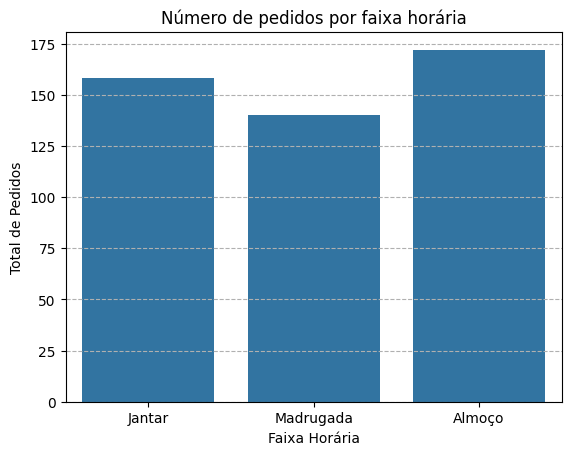

In [20]:
#Crie um gráfico de barras mostrando o número de pedidos por faixa horária.
sns.countplot(df, x="faixa_horaria")
plt.title("Número de pedidos por faixa horária")
plt.ylabel("Total de Pedidos")
plt.xlabel("Faixa Horária")
plt.grid(axis="y", linestyle="--")
plt.show()

In [25]:
#Crie um modelo de regressão para prever o valor_pedido com base nas variáveis:
X = df[["cidade", "categoria_comida", "tempo_entrega_min", "faixa_horaria"]]
y = df["valor_pedido"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

369.66322230315683
